In [1]:
# Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from data import load_housing_data

In [2]:
housing = load_housing_data()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Inspect the `ocean_proximity` attribute

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


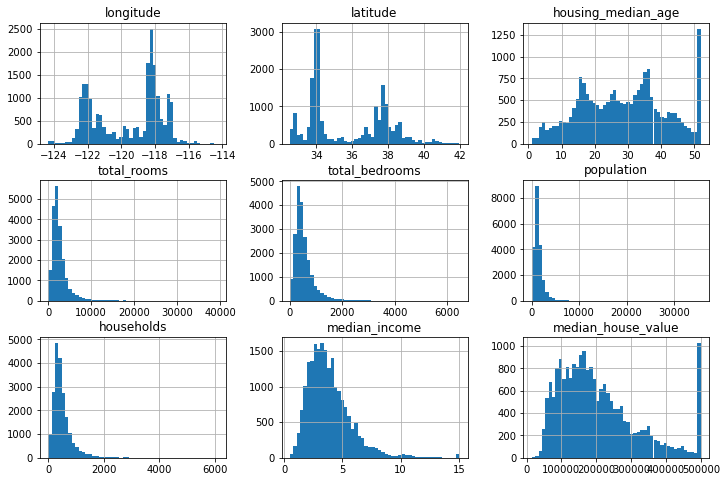

In [6]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
# Use stable features to identify data, such as latitude and longitude.
housing_with_id = housing['latitude'] * 1000 + housing['longitude']

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
# Stratify data based on median income
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3, 4.5, 6, np.Inf],
                               labels=[1, 2, 3, 4, 5])

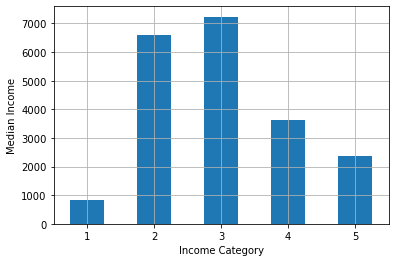

In [9]:
# Plot histogram
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Median Income')
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
stratified_splits = []

for train_index, test_index in splitter.split(housing, housing['income_cat']):
    stratified_train_set_n = housing.iloc[train_index]
    stratified_test_set_n = housing.iloc[test_index]
    stratified_splits.append([stratified_train_set_n, stratified_test_set_n])

In [11]:
# For now use the first split
stratified_train_set, stratified_test_set = stratified_splits[0]

In [12]:
# Get stratified splits easier with `train_test_split` using the `stratify` option.

stratified_train_set, stratified_test_set = train_test_split(housing, test_size=.2, random_state=42,
                                                             stratify=housing['income_cat'])

# Look at the income category proportion.
stratified_test_set['income_cat'].value_counts() / len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
# Drop `income_cat` because it won't be used again.
for set_ in (stratified_test_set, stratified_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
# Make a copy of the train set to explore it.
housing = stratified_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

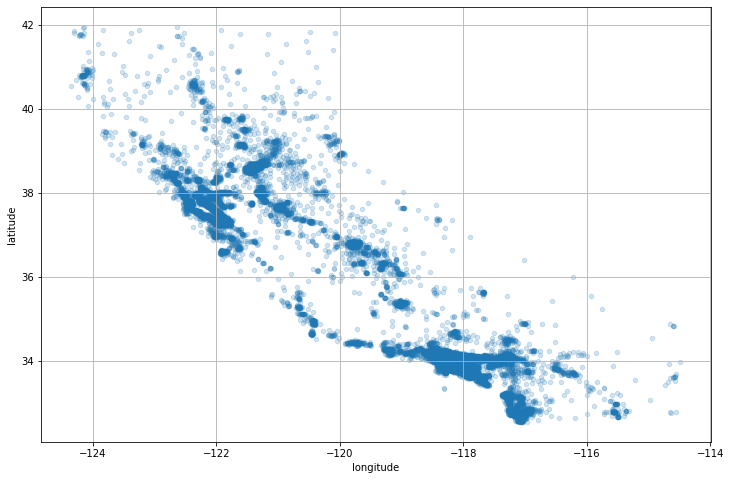

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, figsize=(12, 8), alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

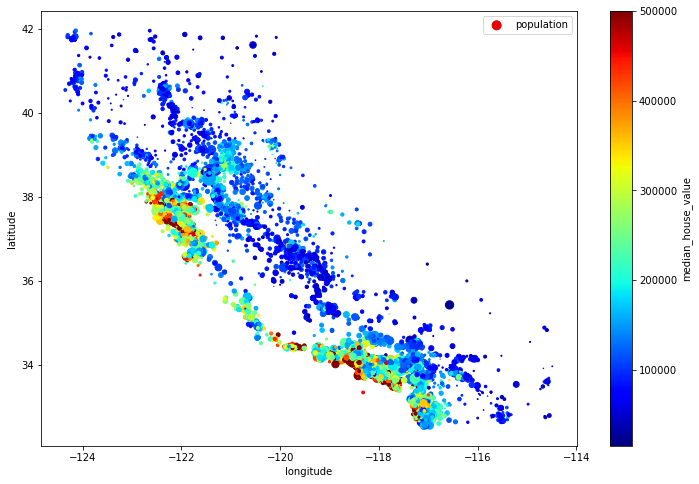

In [16]:
housing.plot(kind="scatter", s=housing["population"] / 100, c='median_house_value', cmap="jet", x="longitude",
             y="latitude", colorbar=True, sharex=False, label="population", figsize=(12, 8))

In [17]:
# Calculate correlations between variables.
correlation_matrix = housing.corr()

correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

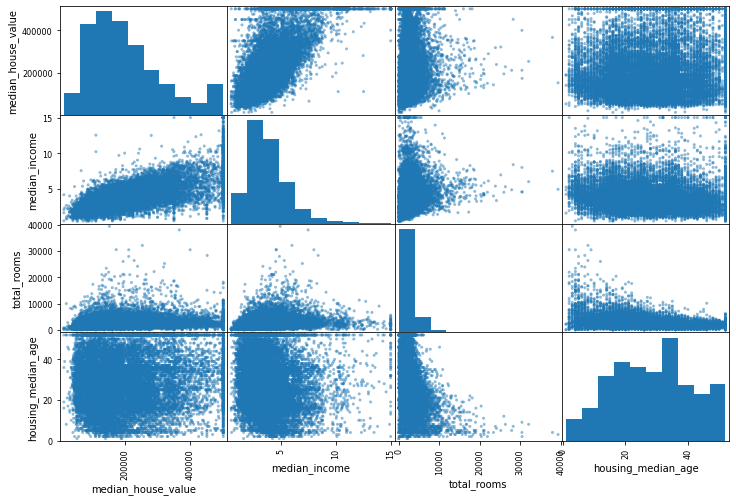

In [18]:
from pandas.plotting import scatter_matrix

# Make pandas correlation plots.
# Since there are 11 attributes we would get 11**2 = 121 plots, so select a few attributes only.
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

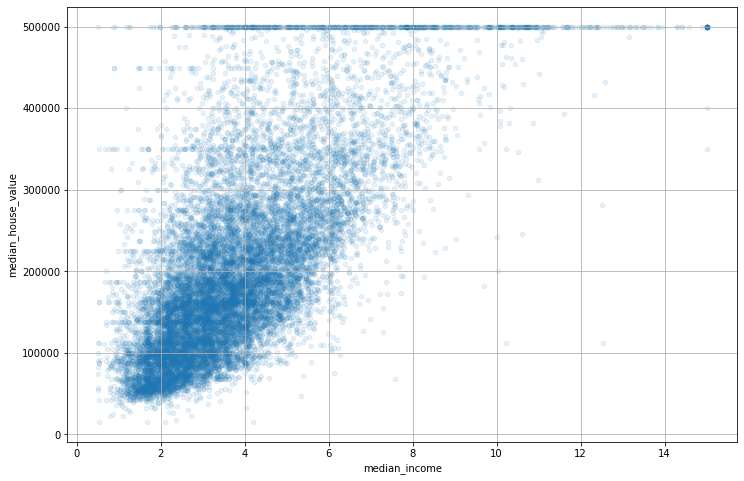

In [19]:
# The median_income attribute seems to be the most correlated with the housing value.
# Plot the median_income against the housing value.
housing.plot(kind="scatter", x='median_income', y='median_house_value', alpha=0.1, grid=True, figsize=(12, 8))

In [20]:
# Create some other attributes that might be more useful than the default ones.
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedroom_to_room_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)
# Note that rooms_per_house is more correlated than other attributes that weren't present before this step.

median_house_value       1.000000
median_income            0.688380
rooms_per_house          0.143663
total_rooms              0.137455
housing_median_age       0.102175
households               0.071426
total_bedrooms           0.054635
population              -0.020153
people_per_house        -0.038224
longitude               -0.050859
latitude                -0.139584
bedroom_to_room_ratio   -0.256397
Name: median_house_value, dtype: float64

In [21]:
# Prepare the data for machine learning!
# Start off with a clean data set
# Drop the label from the predictor: `median_house_value` is the label.
housing = stratified_train_set.drop("median_house_value", axis=1)
housing_labels = stratified_train_set["median_house_value"].copy()

In [22]:
# Apply imputation by setting missing values from the data set to the median.
median = housing["total_bedrooms"]
housing["total_bedrooms"].fillna(median, inplace=True)

In [23]:
from sklearn.impute import SimpleImputer

# Alternatively, impute the dataset using an imputer from Scikit-Learn
imputer = SimpleImputer(strategy="median")
# Imputer only works on numeric types.
housing_numeric = housing.select_dtypes(include=[np.number])

imputer.fit(housing_numeric)
# Print the learned values for the imputer
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [24]:
# Compare the learned values from the imputer to the median, they should be the same!
housing_numeric.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [25]:
# Now actually use the imputer to transform the dataset and replace the mising values
X = imputer.transform(housing_numeric)
# Turn X back into a dataframe
housing_transformed = pd.DataFrame(X, columns=housing_numeric.columns, index=housing_numeric.index)

In [26]:
from sklearn.preprocessing import OrdinalEncoder

# Let's deal with text values from the column "ocean_proximity".
# Most ML algorithms like working better with numbers, so encode the values using
# Scikit-Learn's OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_category = housing[["ocean_proximity"]]
housing_category_encoded = ordinal_encoder.fit_transform(housing_category)
housing_category_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [27]:
# To view the categories for the "ocean_proximity" attribute
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Replacing categorical values

The previous encoding might not be optimal for ML algorithms, since they assume "proximity" when attributes are next to each other. However, this is not the case here.

We can do a so-called **one-hot-encoding**, where we create extra binary attributes, namely one for each category. These attributes are either 1 or 0.

Scikit-Learn provides a one-hot-encoder OneHotEncoder


In [28]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()
housing_cat_1hot = category_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot.toarray()[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Feature Scaling

ML algorithms work best when the data contains features that are in a similar order of magnitude. Therefore, it sometimes is necessary to scale features up or down.

There are various ways to do feature scaling. One is min-max scaling. Another one is standardization, which takes each feature, subtracts the mean and divides it by its standard deviation. The feature ends up having a standard deviation of one and is less sensitive to outliers than the min-max scaling method.

Note: When using a scaler to perform feature scaling, **always** use **training** data to fit the scaler! The scaler can then be used to transform validation or test data.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_numeric_std_scaled = scaler.fit_transform(housing_numeric)

## Heavy Tails

When a feature's distribution has a _heavy tail_, it has values far from the mean that don't become exponentially rare. With this data set we can see that for the population.

<AxesSubplot:>

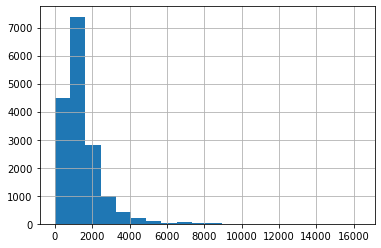

In [30]:
housing["population"].hist(bins=20)

The population's distribution is somewhat skewed to the left.

ML algorithms don't like features with heavy tails. To address this, we can create a feature that's the squared root of the original feature, or raise it to a power between 0 and 1. If the feature has a really long and heavy tail, such as a _power law distribution_, then replacing the feature with its logarithm might help.

(0.0, 3742.2)

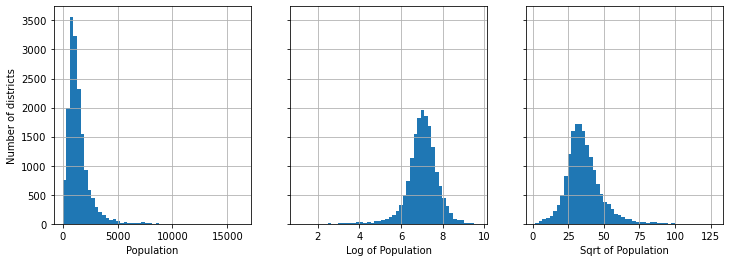

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
bins = 50

housing["population_log"] = np.log(housing["population"])
housing["population_sqrt"] = np.sqrt(housing["population"])
population_hist = housing["population"].hist(bins=bins, ax=ax[0])
population_hist.set_xlabel("Population")
population_hist.set_ylabel("Number of districts")

population_hist_log = housing["population_log"].hist(bins=bins, ax=ax[1])
population_hist_log.set_xlabel("Log of Population")
population_hist_log.set_yticklabels([])
population_hist_log.set_ylim(population_hist.get_ylim())

population_hist_sqrt = housing["population_sqrt"].hist(bins=bins, ax=ax[2])
population_hist_sqrt.set_yticklabels([])
population_hist_sqrt.set_xlabel("Sqrt of Population")
population_hist_sqrt.set_ylim(population_hist.get_ylim())

# Custom Transformers

Custom transformers can be done by subclassing BaseEstimator and TransformerMixin. For this dataset we can create a transformer that finds clusters and classifies each entry based on the coordinates of each entry.

In [32]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1, random_state=None):
        self.kmeans_ = None
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # Always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [33]:
# Use the transformer
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
similarities[:3].round(2)

/Users/andresap/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

## Transformation Pipeline

There are a lot of steps to prepare the data for ML. Scikit-Learn provides the `Pipeline` class to define the necessary transformations.

In [34]:


from sklearn.pipeline import Pipeline, make_pipeline

num_pipeline_1 = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

# Another way is to use the `make_pipeline` function, which automatically names the transformers in the pipeline.

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

housing_num_prepared = num_pipeline.fit_transform(housing_numeric)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [35]:
# Recover the dataframe using the `get_feature_names_out()` function from the pipeline
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
                                       index=housing_numeric.index)

In [36]:
from sklearn.compose import ColumnTransformer

# We can also create a pipeline that takes care of numerical and categorical columns.

num_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms",
                  "total_bedrooms", "population", "households", "median_income"]
cat_attributes = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing_manual = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])



In [39]:
from sklearn.compose import make_column_transformer, make_column_selector

# Or, use some Scikit-Learn sugar to make things more compact

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

housing_prepared = preprocessing.fit_transform(housing)

df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
df_housing_prepared.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-1__population_log,pipeline-1__population_sqrt,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.456906,0.325475,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,-0.711654,-0.800449,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.941997,-0.970687,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.670700,0.589257,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.719093,0.651905,0.0,0.0,0.0,0.0,1.0
